In [41]:
import pandas as pd
df = pd.read_pickle('/root/Sefaria-Project/ML/data/top_ten_categorized_df.pkl')

In [43]:
df.head()

,En,Topics,category_id
3,modifi mean board refer uniqu name modifi even...,dinei-haget,0
11,hand katafr explan hand slant obvious readi re...,dinei-haget,0
67,similar two basket untith fruit front first da...,laws-of-holidays,1
118,mishna state one ate food prepar festiv eiruv ...,laws-of-holidays,1
131,one may mix water salt oil dip one bread put c...,rabbinically-forbidden-activities-on-shabbat,2


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['En'], df['Topics'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [46]:
print(clf.predict(count_vect.transform(["one may mix water salt oil dip one bread put ."])))


['rabbinically-forbidden-activities-on-shabbat']


In [45]:
print(clf.predict(count_vect.transform(["mishna state one ate food prepar festiv eiruv."])))

['laws-of-holidays']


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


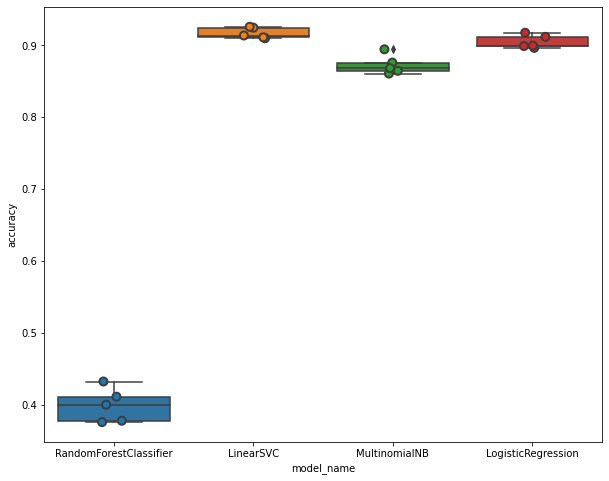

In [50]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [51]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.917093
LogisticRegression        0.904958
MultinomialNB             0.872894
RandomForestClassifier    0.399725
Name: accuracy, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

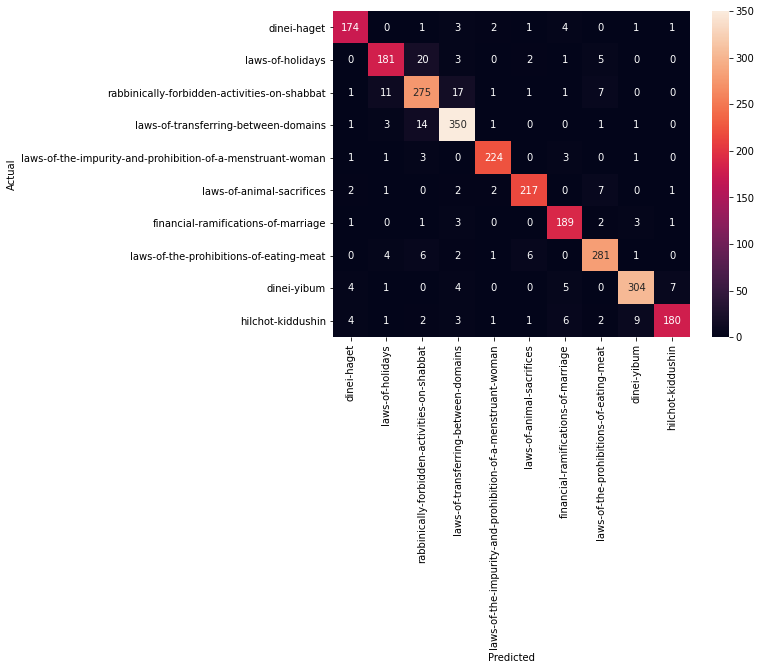

In [55]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Topics.values, yticklabels=category_id_df.Topics.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [58]:

from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("\n'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Topics', 'En']])


'rabbinically-forbidden-activities-on-shabbat' predicted as 'laws-of-holidays' : 11 examples.


,Topics,En
174222,rabbinically-forbidden-activities-on-shabbat,gemara discuss halakha mishna learn one may lo...
4703,rabbinically-forbidden-activities-on-shabbat,regard pit aramean date low qualiti occasion f...
56330,rabbinically-forbidden-activities-on-shabbat,rabbi yitz ak said differ reason egg laid fest...
60425,rabbinically-forbidden-activities-on-shabbat,fig raisin semi edibl peopl would eat other wo...
147105,rabbinically-forbidden-activities-on-shabbat,gemara pose anoth question regard issu learn e...
126788,rabbinically-forbidden-activities-on-shabbat,gemara offer yet anoth suggest learn amishna c...
98300,rabbinically-forbidden-activities-on-shabbat,word applic anim feed upon domest anim wild an...
15901,rabbinically-forbidden-activities-on-shabbat,gemara note rabbi yo anan also hold prohibit e...
98319,rabbinically-forbidden-activities-on-shabbat,gemara ask alreadi learn halakha replac bandag...
68297,rabbinically-forbidden-activities-on-shabbat,rabba said accord opinion reason manner one se...



'laws-of-holidays' predicted as 'rabbinically-forbidden-activities-on-shabbat' : 20 examples.


,Topics,En
42025,laws-of-holidays,gemara ask circumst case necessari appli rule ...
139903,laws-of-holidays,may strain mustard strainer appear like sort m...
5524,laws-of-holidays,gemara answer differ sinc permit immers cloth ...
127551,laws-of-holidays,court must appoint offic walk around patrol ga...
138647,laws-of-holidays,gemara comment necessari cite three case teach...
136830,laws-of-holidays,permit cover fruit wine jug brick water leak roof
141967,laws-of-holidays,one may chop wood neither beam set asid build ...
102052,laws-of-holidays,women may wail cri togeth may lament one speak...
73914,laws-of-holidays,thing forbidden holiday seifim climb tree ride...
95379,laws-of-holidays,said one complet righteous judgement seal imme...



'laws-of-transferring-between-domains' predicted as 'rabbinically-forbidden-activities-on-shabbat' : 14 examples.


,Topics,En
157609,laws-of-transferring-between-domains,likewis one packag shoulder ran even whole day...
129847,laws-of-transferring-between-domains,abay said rav yosef rule rav yehuda rule teach...
28938,laws-of-transferring-between-domains,gemara answer comparison grant rabbi yo anan h...
105326,laws-of-transferring-between-domains,woman go wear shoe whose top torn lest laugh h...
135833,laws-of-transferring-between-domains,reish lakish said name rabbi yannai open form ...
7707,laws-of-transferring-between-domains,woman go preserv stone counterweight preserv s...
172140,laws-of-transferring-between-domains,rather rav adda citi naresh explain rav yosef ...
4805,laws-of-transferring-between-domains,may go pepper grain salt anyth put mouth bad b...
171880,laws-of-transferring-between-domains,gemara rais difficulti hold bucket hold anim p...
155875,laws-of-transferring-between-domains,rabbi iyya bar abba said rabbi yo anan said ba...



'laws-of-the-prohibitions-of-eating-meat' predicted as 'rabbinically-forbidden-activities-on-shabbat' : 6 examples.


,Topics,En
26232,laws-of-the-prohibitions-of-eating-meat,rather mishna teach us first tanna rabbi yosei...
72644,laws-of-the-prohibitions-of-eating-meat,gemara respond rav shimi bar iyya alreadi rais...
54805,laws-of-the-prohibitions-of-eating-meat,
71203,laws-of-the-prohibitions-of-eating-meat,taught baraita accord opinion shmuel hot permi...
27184,laws-of-the-prohibitions-of-eating-meat,gemara cite continu baraita one might thought ...
104814,laws-of-the-prohibitions-of-eating-meat,gemara analyz disput rav huna rav na man rav y...



'rabbinically-forbidden-activities-on-shabbat' predicted as 'laws-of-transferring-between-domains' : 17 examples.


,Topics,En
28374,rabbinically-forbidden-activities-on-shabbat,howev permit go public domain wrap curtain cal...
11499,rabbinically-forbidden-activities-on-shabbat,one may go public domain shabbat wear herb tie...
917,rabbinically-forbidden-activities-on-shabbat,rav na man said shmuel said regard small earth...
150640,rabbinically-forbidden-activities-on-shabbat,rami bar ye ezkel sent rav huna say us pleas e...
30070,rabbinically-forbidden-activities-on-shabbat,chair compris differ section order sit one ope...
71150,rabbinically-forbidden-activities-on-shabbat,rava said
154621,rabbinically-forbidden-activities-on-shabbat,one may measur mitzvah calcul whether mikvah f...
156759,rabbinically-forbidden-activities-on-shabbat,one util someth piec jewelri normal way worn g...
119832,rabbinically-forbidden-activities-on-shabbat,remov four five kupa divid small group make mu...
19615,rabbinically-forbidden-activities-on-shabbat,rami bar ye ezkel sent request rav amram let m...



'laws-of-the-prohibitions-of-eating-meat' predicted as 'laws-of-animal-sacrifices' : 6 examples.


,Topics,En
24025,laws-of-the-prohibitions-of-eating-meat,gemara relat rabbi zeira ascend eretz yisrael ...
174259,laws-of-the-prohibitions-of-eating-meat,rava say concern three mention karet state reg...
36103,laws-of-the-prohibitions-of-eating-meat,address need mishna state prohibit eat sciatic...
69565,laws-of-the-prohibitions-of-eating-meat,rest mani detail command elucid third chapter ...
81940,laws-of-the-prohibitions-of-eating-meat,law command may memori bless explain bava kamm...
28245,laws-of-the-prohibitions-of-eating-meat,gemara offer two answer wish say mishna refer ...



'hilchot-kiddushin' predicted as 'financial-ramifications-of-marriage' : 6 examples.


,Topics,En
41126,hilchot-kiddushin,likewis marri father widow divorc father still...
169700,hilchot-kiddushin,gemara question explan regard rav huna say rav...
2914,hilchot-kiddushin,taught baraita regard issu rabbi anina ben gam...
9126,hilchot-kiddushin,gemara ask case sale also written men shall bu...
66062,hilchot-kiddushin,mishna teach woman acquir money gemara ask der...
171928,hilchot-kiddushin,gemara ask howev regard rav huna said rav said...



'rabbinically-forbidden-activities-on-shabbat' predicted as 'laws-of-the-prohibitions-of-eating-meat' : 7 examples.


,Topics,En
40434,rabbinically-forbidden-activities-on-shabbat,sage taught baraita regard salt fish permit mo...
20725,rabbinically-forbidden-activities-on-shabbat,gemara infer suit type labor similar origin us...
29768,rabbinically-forbidden-activities-on-shabbat,gemara reject argument differ two case broken ...
97621,rabbinically-forbidden-activities-on-shabbat,one may clear bread crumb tabl even less oliv ...
101740,rabbinically-forbidden-activities-on-shabbat,may move anyth fit food domest beast wild anim...
26005,rabbinically-forbidden-activities-on-shabbat,state permit move salt meat shabbat fit consum...
126349,rabbinically-forbidden-activities-on-shabbat,forbidden gather salt salt deposit similar bin...



'laws-of-animal-sacrifices' predicted as 'laws-of-the-prohibitions-of-eating-meat' : 7 examples.


,Topics,En
103491,laws-of-animal-sacrifices,one deriv halakha regard bone tendon phrase fl...
46640,laws-of-animal-sacrifices,rabbi yehuda hanasi would respond sciatic nerv...
145824,laws-of-animal-sacrifices,gemara reject suggest one cannot arriv conclus...
39767,laws-of-animal-sacrifices,gemara explain one deriv fortiori infer vers s...
139060,laws-of-animal-sacrifices,necessari vers includ vers necessari sciatic n...
41935,laws-of-animal-sacrifices,say challeng explan said case tereifa anim typ...
78004,laws-of-animal-sacrifices,rather rabbi anina terita taught mean mishna r...



'hilchot-kiddushin' predicted as 'dinei-yibum' : 9 examples.


,Topics,En
147632,hilchot-kiddushin,gemara respond difficult one say mishna accord...
3881,hilchot-kiddushin,daughter becom bogeret older twelv half father...
7626,hilchot-kiddushin,command releas levir marriag done three jewish...
50403,hilchot-kiddushin,howev accord reish lakish said entir household...
58390,hilchot-kiddushin,taught baraita regard one say woman betroth co...
57401,hilchot-kiddushin,gemara ask differ minor girl may perform refus...
41767,hilchot-kiddushin,gemara deriv proof come hear sage tavyumei tau...
167523,hilchot-kiddushin,son die instruct father object requir yavam
133234,hilchot-kiddushin,taught baraita rabbi simai say relationship in...



'dinei-yibum' predicted as 'hilchot-kiddushin' : 7 examples.


,Topics,En
96666,dinei-yibum,rav kahana focus case one perform refus regard...
12165,dinei-yibum,gemara comment rav kahana rais object resolv m...
93014,dinei-yibum,rav giddel said rav iyya bar yosef said rav sa...
23047,dinei-yibum,rava said said betroth levir betroth everyon a...
576,dinei-yibum,rav amram said rabbi yitz ak said deal minor g...
104788,dinei-yibum,gemara answer stand reason sinc betroth take e...
14785,dinei-yibum,rav sheshet said resolut contradict latter cla...
